In [1]:
!pip install duckdb


In [2]:
import duckdb
print("DuckDB is working in Jupyter Notebook inside VSCode!")


DuckDB is working in Jupyter Notebook inside VSCode!


In [3]:
import duckdb
print("DuckDB is working in Jupyter Notebook inside VSCode!")


DuckDB is working in Jupyter Notebook inside VSCode!


In [4]:
import duckdb

# Connect to DuckDB
con = duckdb.connect("/Users/rubiyahbiamin/DSAI-Group2/olist.db")

# Check the tables
tables = con.execute("SHOW TABLES;").fetchall()
print("Tables in DuckDB:", tables)


Tables in DuckDB: [('olist_customers',), ('olist_geolocation',), ('olist_order_items',), ('olist_order_payments',), ('olist_order_reviews',), ('olist_orders',), ('olist_products',), ('olist_sellers',)]


In [5]:
import pandas as pd

# Load customers table
df_customers = con.execute("SELECT * FROM olist_customers").df()
df_customers.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,09790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,01151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,08775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [6]:
df_orders = con.execute("SELECT * FROM olist_orders").df()
df_products = con.execute("SELECT * FROM olist_products").df()
df_sellers = con.execute("SELECT * FROM olist_sellers").df()

In [7]:
df_orders.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26


In [8]:
df_orders.fillna({"order_status": "unknown"}, inplace=True)
df_products.dropna(inplace=True)


In [9]:
df_orders["order_purchase_timestamp"] = pd.to_datetime(df_orders["order_purchase_timestamp"])

In [10]:
df_customers.rename(columns={"geolocation_zip_code_prefix": "zip_code"}, inplace=True)

In [11]:
df_orders.isnull().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

In [12]:
df_orders['order_approved_at'] = df_orders['order_approved_at'].fillna(df_orders['order_approved_at'].mean())


In [13]:
df_orders['order_approved_at'] = df_orders['order_approved_at'].fillna(df_orders['order_approved_at'].mean())

In [14]:
df_orders['order_approved_at'] = df_orders['order_approved_at'].fillna(df_orders['order_approved_at'].mean())

In [15]:
df_orders['order_approved_at'] = df_orders['order_approved_at'].fillna(df_orders['order_approved_at'].mean())

In [16]:
# Fill missing values for 'order_estimated_delivery_date' column with the mean value
df_orders['order_estimated_delivery_date'] = df_orders['order_estimated_delivery_date'].fillna(df_orders['order_estimated_delivery_date'].mean())


In [17]:
# Fill missing values for 'order_estimated_delivery_date' column with the mean value
df_orders['order_estimated_delivery_date'] = df_orders['order_estimated_delivery_date'].fillna(df_orders['order_estimated_delivery_date'].mean())


In [18]:
# Check if there are any remaining missing values
print(df_orders.isnull().sum())

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                   0
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64


In [19]:
df_orders['order_delivered_carrier_date'].fillna(df_orders['order_delivered_carrier_date'].median(), inplace=True)
df_orders['order_delivered_customer_date'].fillna(df_orders['order_delivered_customer_date'].median(), inplace=True)


/var/folders/qf/l0ftqjwj5rs69cfk915ms6s40000gn/T/ipykernel_45061/2406136521.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_orders['order_delivered_carrier_date'].fillna(df_orders['order_delivered_carrier_date'].median(), inplace=True)
/var/folders/qf/l0ftqjwj5rs69cfk915ms6s40000gn/T/ipykernel_45061/2406136521.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work b

In [20]:
df_orders['order_delivered_carrier_date'] = df_orders['order_delivered_carrier_date'].fillna(df_orders['order_delivered_carrier_date'].median())
df_orders['order_delivered_customer_date'] = df_orders['order_delivered_customer_date'].fillna(df_orders['order_delivered_customer_date'].median())


In [21]:
print(df_orders.isnull().sum())


order_id                         0
customer_id                      0
order_status                     0
order_purchase_timestamp         0
order_approved_at                0
order_delivered_carrier_date     0
order_delivered_customer_date    0
order_estimated_delivery_date    0
dtype: int64


In [22]:
import duckdb

# Connect to the DuckDB database
con = duckdb.connect("/Users/rubiyahbiamin/DSAI-Group2/olist.db")

# SQL Query to join customers with their purchased products
query = """
SELECT 
    c.customer_id,
    p.product_id,
    p.product_category_name,
    COUNT(o.order_id) AS num_orders,
    SUM(oi.price) AS total_spent,
    COUNT(DISTINCT oi.product_id) AS unique_products_bought
FROM olist_customers c
JOIN olist_orders o ON c.customer_id = o.customer_id
JOIN olist_order_items oi ON o.order_id = oi.order_id
JOIN olist_products p ON oi.product_id = p.product_id
GROUP BY c.customer_id, p.product_id, p.product_category_name
"""

# Run the query and store the result in a Pandas DataFrame
df_customers_products = con.execute(query).fetchdf()


In [23]:
print(df_customers_products.isnull().sum())


customer_id                  0
product_id                   0
product_category_name     1460
num_orders                   0
total_spent                  0
unique_products_bought       0
dtype: int64


In [24]:
df_customers_products.fillna(0, inplace=True)


In [25]:
print(df_customers_products.isnull().sum())

customer_id               0
product_id                0
product_category_name     0
num_orders                0
total_spent               0
unique_products_bought    0
dtype: int64


In [26]:
from sklearn.preprocessing import StandardScaler

# Select only numerical features for clustering
features = df_customers_products[['num_orders', 'total_spent', 'unique_products_bought']]

# Scale the features
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)


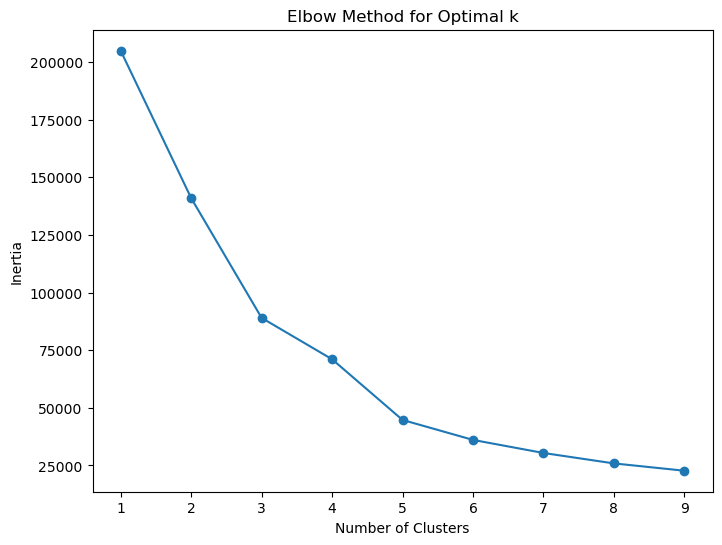

In [27]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Find the optimal number of clusters
inertia = []
K_range = range(1, 10)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(features_scaled)
    inertia.append(kmeans.inertia_)

# Plot the Elbow Curve
plt.figure(figsize=(8,6))
plt.plot(K_range, inertia, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.show()


In [28]:
# Apply K-Means with the chosen number of clusters (e.g., k=3)
kmeans = KMeans(n_clusters=3, random_state=42)
df_customers_products['cluster'] = kmeans.fit_predict(features_scaled)


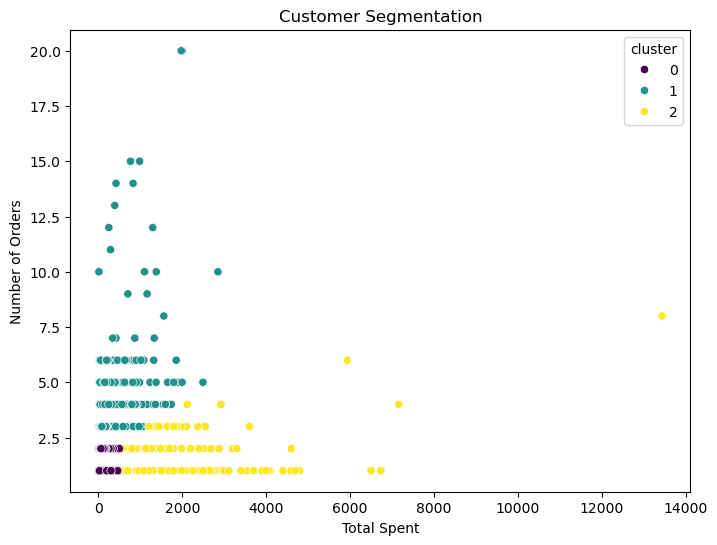

In [29]:
import seaborn as sns

plt.figure(figsize=(8,6))
sns.scatterplot(x=df_customers_products['total_spent'], 
                y=df_customers_products['num_orders'], 
                hue=df_customers_products['cluster'], 
                palette='viridis')
plt.xlabel('Total Spent')
plt.ylabel('Number of Orders')
plt.title('Customer Segmentation')
plt.show()


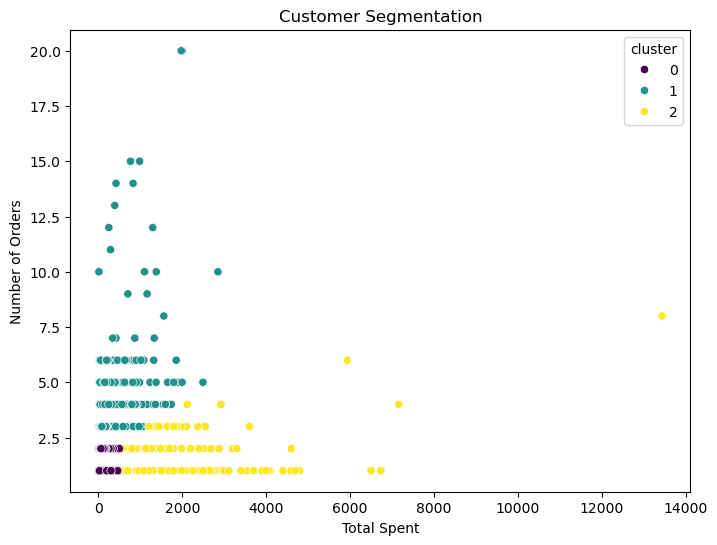

In [30]:
import seaborn as sns

plt.figure(figsize=(8,6))
sns.scatterplot(x=df_customers_products['total_spent'], 
                y=df_customers_products['num_orders'], 
                hue=df_customers_products['cluster'], 
                palette='viridis')
plt.xlabel('Total Spent')
plt.ylabel('Number of Orders')
plt.title('Customer Segmentation')
plt.show()


In [32]:
print(features_scaled.shape)  # The input used for KMeans
print(df_orders.shape)        # The DataFrame where you're adding clusters



(102425, 3)
(99441, 8)


In [33]:
print(df_orders.shape)  # Check original dataframe size
print(features_scaled.shape)  # Check features used for clustering


(99441, 8)
(102425, 3)


In [35]:
print(df_orders.shape)  # Should match the original dataset
print(features_scaled.shape)  # Should have the same number of rows as df_orders



(99441, 8)
(102425, 3)


In [36]:
# Check the rows of df_orders that were dropped (if any)
df_orders_dropped_rows = len(df_orders) - len(features_scaled)
print(f"Dropped rows from df_orders: {df_orders_dropped_rows}")


Dropped rows from df_orders: -2984


In [41]:
print(df_orders.columns)


Index(['order_id', 'customer_id', 'order_status', 'order_purchase_timestamp',
       'order_approved_at', 'order_delivered_carrier_date',
       'order_delivered_customer_date', 'order_estimated_delivery_date'],
      dtype='object')


In [45]:
df_order_items = pd.read_csv("data/olist_order_items.csv")  # Load order items if not already loaded

# Compute total order value per order (price + freight cost)
df_order_items['order_value'] = df_order_items['price'] + df_order_items['freight_value']

# Aggregate total spending per order
df_total_spent = df_order_items.groupby("order_id")['order_value'].sum().reset_index()

# Merge with df_orders
df_orders = df_orders.merge(df_total_spent, on="order_id", how="left")


In [46]:
print(df_orders.columns)  # Ensure 'total_spent' exists now


Index(['order_id', 'customer_id', 'order_status', 'order_purchase_timestamp',
       'order_approved_at', 'order_delivered_carrier_date',
       'order_delivered_customer_date', 'order_estimated_delivery_date',
       'order_value'],
      dtype='object')


In [47]:
df_orders['num_orders'] = df_orders.groupby('customer_id')['order_id'].transform('count')
df_orders['unique_products_bought'] = df_orders.groupby('customer_id')['order_id'].transform('nunique')


In [48]:
print(df_orders.columns)  # Ensure 'total_spent' exists now


Index(['order_id', 'customer_id', 'order_status', 'order_purchase_timestamp',
       'order_approved_at', 'order_delivered_carrier_date',
       'order_delivered_customer_date', 'order_estimated_delivery_date',
       'order_value', 'num_orders', 'unique_products_bought'],
      dtype='object')


In [49]:
print(df_orders.columns)


Index(['order_id', 'customer_id', 'order_status', 'order_purchase_timestamp',
       'order_approved_at', 'order_delivered_carrier_date',
       'order_delivered_customer_date', 'order_estimated_delivery_date',
       'order_value', 'num_orders', 'unique_products_bought'],
      dtype='object')


In [50]:
# Make sure the data used for scaling matches df_orders
df_orders_cleaned = df_orders.dropna(subset=['total_spent', 'num_orders', 'unique_products_bought'])

# Perform scaling on cleaned data
scaler = StandardScaler()
features_scaled = scaler.fit_transform(df_orders_cleaned[['total_spent', 'num_orders', 'unique_products_bought']])

# Convert back to DataFrame with matching index
features_scaled_df = pd.DataFrame(features_scaled, 
                                  columns=['total_spent_scaled', 'num_orders_scaled', 'unique_products_scaled'], 
                                  index=df_orders_cleaned.index)


KeyError: ['total_spent']

In [51]:
df_orders['total_spent'] = df_orders.groupby('customer_id')['order_value'].transform('sum')


In [52]:
print(df_orders.columns.tolist())  # Confirm 'total_spent' is present


['order_id', 'customer_id', 'order_status', 'order_purchase_timestamp', 'order_approved_at', 'order_delivered_carrier_date', 'order_delivered_customer_date', 'order_estimated_delivery_date', 'order_value', 'num_orders', 'unique_products_bought', 'total_spent']


Steps for Data Cleaning & Clustering for Customer Segmentation
1. Clean and merge data (handling missing values, aggregating relevant metrics)

2. Feature engineering (compute total spending, unique products bought, etc.)

3. Scale the data (for clustering to work effectively)

4. Apply clustering algorithm (KMeans)

5. Analyze the clusters (customer behavior insights)




Step 1: Load and Merge Data

In [56]:
import pandas as pd

# Load datasets (ensure file paths are correct)
df_orders = pd.read_csv("data/olist_orders.csv")
df_order_items = pd.read_csv("data/olist_order_items.csv")

# Merge order details with items purchased
df_orders = df_orders.merge(df_order_items, on="order_id", how="left")


In [60]:
df_orders.update(
    df_orders[['order_delivered_carrier_date', 'order_delivered_customer_date']].fillna(
        {'order_delivered_carrier_date': mode_carrier_date, 'order_delivered_customer_date': mode_customer_date}
    )
)


In [61]:
print(df_orders[['order_delivered_carrier_date', 'order_delivered_customer_date']].isnull().sum())


order_delivered_carrier_date     0
order_delivered_customer_date    0
dtype: int64


In [62]:
print(df_orders[['order_delivered_carrier_date', 'order_delivered_customer_date']].dtypes)


order_delivered_carrier_date     datetime64[ns]
order_delivered_customer_date    datetime64[ns]
dtype: object


In [63]:
print(df_orders[['order_delivered_carrier_date', 'order_delivered_customer_date']].head(10))


  order_delivered_carrier_date order_delivered_customer_date
0          2017-10-04 19:55:00           2017-10-10 21:25:13
1          2018-07-26 14:31:00           2018-08-07 15:27:45
2          2018-08-08 13:50:00           2018-08-17 18:06:29
3          2017-11-22 13:39:59           2017-12-02 00:28:42
4          2018-02-14 19:46:34           2018-02-16 18:17:02
5          2017-07-11 14:58:04           2017-07-26 10:57:55
6          2018-01-24 18:44:33           2018-02-02 20:57:23
7          2017-05-22 10:07:46           2017-05-26 12:55:51
8          2017-01-26 14:16:31           2017-02-02 14:08:10
9          2017-08-10 19:45:24           2017-08-16 17:14:30


In [64]:
df_orders.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113425 entries, 0 to 113424
Data columns (total 14 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   order_id                       113425 non-null  object        
 1   customer_id                    113425 non-null  object        
 2   order_status                   113425 non-null  object        
 3   order_purchase_timestamp       113425 non-null  object        
 4   order_approved_at              113264 non-null  object        
 5   order_delivered_carrier_date   113425 non-null  datetime64[ns]
 6   order_delivered_customer_date  113425 non-null  datetime64[ns]
 7   order_estimated_delivery_date  113425 non-null  object        
 8   order_item_id                  112650 non-null  float64       
 9   product_id                     112650 non-null  object        
 10  seller_id                      112650 non-null  object        
 11  

In [65]:
print(df_orders.isnull().sum())


order_id                           0
customer_id                        0
order_status                       0
order_purchase_timestamp           0
order_approved_at                161
order_delivered_carrier_date       0
order_delivered_customer_date      0
order_estimated_delivery_date      0
order_item_id                    775
product_id                       775
seller_id                        775
shipping_limit_date              775
price                            775
freight_value                    775
dtype: int64


In [66]:
df_orders['order_approved_at'].fillna(df_orders['order_purchase_timestamp'], inplace=True)


/var/folders/qf/l0ftqjwj5rs69cfk915ms6s40000gn/T/ipykernel_45061/2118304758.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_orders['order_approved_at'].fillna(df_orders['order_purchase_timestamp'], inplace=True)


In [67]:
df_orders['order_approved_at'] = pd.to_datetime(df_orders['order_approved_at'])


In [68]:
df_orders.dropna(subset=['order_item_id', 'product_id', 'seller_id', 'shipping_limit_date', 'price', 'freight_value'], inplace=True)


In [69]:
date_columns = ['order_purchase_timestamp', 'order_approved_at', 'order_estimated_delivery_date', 'shipping_limit_date']
df_orders[date_columns] = df_orders[date_columns].apply(pd.to_datetime)


In [70]:
print(df_orders.isnull().sum())


order_id                         0
customer_id                      0
order_status                     0
order_purchase_timestamp         0
order_approved_at                0
order_delivered_carrier_date     0
order_delivered_customer_date    0
order_estimated_delivery_date    0
order_item_id                    0
product_id                       0
seller_id                        0
shipping_limit_date              0
price                            0
freight_value                    0
dtype: int64


Step 3.1: Creating Features for Clustering

1️⃣ Total Money Spent (total_spent),
We calculate this from price and freight_value:

In [71]:
df_orders['total_spent'] = df_orders.groupby('customer_id')['price'].transform('sum') + df_orders.groupby('customer_id')['freight_value'].transform('sum')


2️⃣ Number of Orders (num_orders),
Count how many orders each customer has made:

In [72]:
df_orders['num_orders'] = df_orders.groupby('customer_id')['order_id'].transform('count')


3️⃣ Unique Products Bought (unique_products_bought), 
Count how many different products each customer has purchased:

In [73]:
df_orders['unique_products_bought'] = df_orders.groupby('customer_id')['product_id'].transform('nunique')


🔹 Step 3.2: Cleaning & Preparing Features:
1️⃣ Select Only Relevant Columns:
Now, we select the customer-level features for clustering:

In [74]:
df_customers = df_orders[['customer_id', 'total_spent', 'num_orders', 'unique_products_bought']].drop_duplicates()


2️⃣ Handle Missing Values,
Check for missing values:

In [75]:
print(df_customers.isnull().sum())


customer_id               0
total_spent               0
num_orders                0
unique_products_bought    0
dtype: int64


🔹 Step 3.3: Scale the Features:
Since clustering algorithms work better with standardized data:

In [76]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
features_scaled = scaler.fit_transform(df_customers[['total_spent', 'num_orders', 'unique_products_bought']])


In [77]:
df_scaled = pd.DataFrame(features_scaled, columns=['total_spent', 'num_orders', 'unique_products_bought'], index=df_customers.index)


🔹 Step 3.4: Apply Clustering Algorithm:
1️⃣ Choose Number of Clusters (Elbow Method)
We use the Elbow Method to find the best number of clusters:

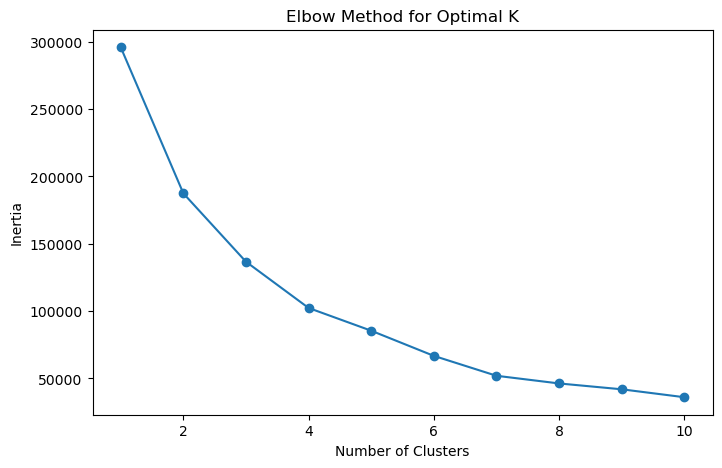

In [78]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

inertia = []
K = range(1, 11)  # Test clusters from 1 to 10

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(features_scaled)
    inertia.append(kmeans.inertia_)

# Plot the elbow curve
plt.figure(figsize=(8, 5))
plt.plot(K, inertia, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal K')
plt.show()


In [79]:
kmeans = KMeans(n_clusters=4, random_state=42)
df_customers['cluster'] = kmeans.fit_predict(features_scaled)


🔹 Step 3.5: Analyze Clusters
Finally, check the cluster distribution:

In [80]:
print(df_customers['cluster'].value_counts())


cluster
2    90973
1     3150
0     2950
3     1593
Name: count, dtype: int64


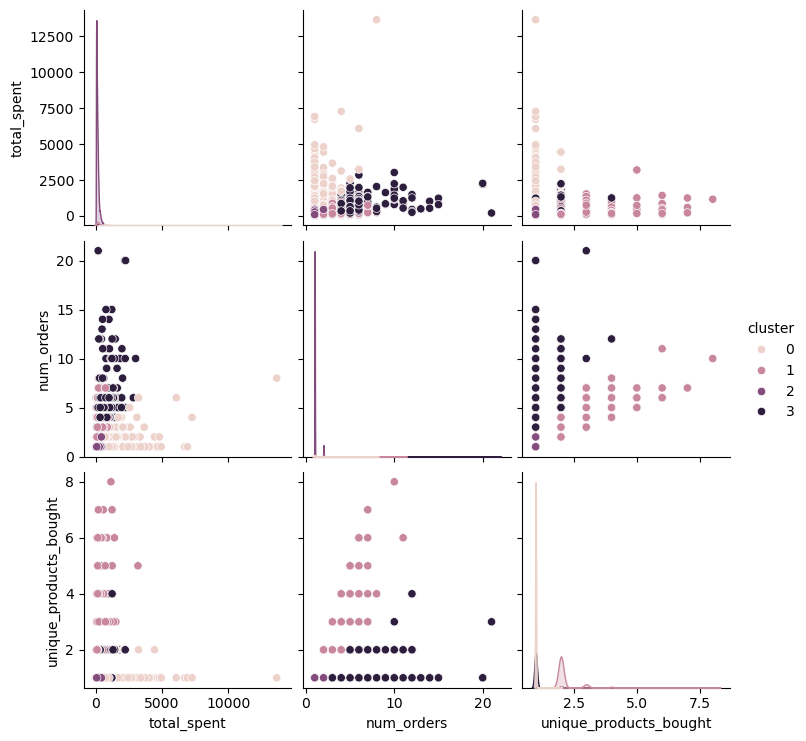

In [85]:
import seaborn as sns

sns.pairplot(df_customers, hue='cluster', diag_kind='kde')
plt.show()



In [82]:
print(df_customers['cluster'].value_counts())


cluster
2    90973
1     3150
0     2950
3     1593
Name: count, dtype: int64


In [84]:
# Select only numeric columns
numeric_columns = df_customers.select_dtypes(include=['float64', 'int64']).columns

# Group by 'cluster' and calculate the mean for numeric columns
cluster_summary = df_customers.groupby('cluster')[numeric_columns].mean()

# Display the result
print(cluster_summary)



         total_spent  num_orders  unique_products_bought
cluster                                                 
0        1049.156095    1.106441                1.006780
1         226.542057    2.308889                2.164762
2         126.192057    1.052807                1.000000
3         348.314664    3.977401                1.043942



Cluster 0:

Customers in this cluster have the highest total spending (1049.16), but their number of orders is relatively low (1.11 orders), and they buy slightly more than 1 unique product on average (1.01).

Cluster 1:

This cluster has the lowest total spending (226.54), but customers here place the most orders on average (2.31 orders). They also buy more unique products on average (2.16), indicating a more diverse purchasing behavior.

Cluster 2:

Customers in this cluster have a total spending of 126.19 (the lowest), they make a low number of orders (1.05), and purchase slightly more than 1 unique product on average (1.00), which suggests they might be more selective or less active overall.

Cluster 3:

Cluster 3 customers have a moderate total spending (348.31), but they place the highest number of orders (3.98 orders). They also buy around 1.04 unique products, indicating that they are quite active in purchasing multiple items.

Summary of Customer Types by Cluster:
Cluster 0: High spenders, but not many orders or variety in products.

Cluster 1: Low spenders, but more frequent and diverse orders.

Cluster 2: Low spenders, with minimal activity and product variety.

Cluster 3: Moderately high spenders with a high frequency of orders and moderate product diversity.

In [90]:
from sklearn.cluster import KMeans

# Select relevant features for clustering (adjust as needed)
clustering_data = df_orders[['total_spent', 'num_orders', 'unique_products_bought']]

# Fit KMeans clustering on the data
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(clustering_data)

# Assign the cluster labels back to df_orders
df_orders['cluster'] = kmeans.labels_


In [91]:
df_orders_cleaned = df_orders.dropna(subset=['total_spent', 'num_orders', 'unique_products_bought'])
kmeans.fit(df_orders_cleaned[['total_spent', 'num_orders', 'unique_products_bought']])
df_orders_cleaned['cluster'] = kmeans.labels_


In [92]:
# Check the shape of df_orders
print(df_orders.shape)

# Select the relevant features for clustering (adjust based on your data)
clustering_data = df_orders[['total_spent', 'num_orders', 'unique_products_bought']]

# Check the shape of the clustering data
print(clustering_data.shape)



(112650, 18)
(112650, 3)


In [93]:
from sklearn.cluster import KMeans

# Initialize the KMeans model with the desired number of clusters (e.g., 4)
kmeans = KMeans(n_clusters=4, random_state=42)

# Fit the KMeans model on the relevant columns (total_spent, num_orders, unique_products_bought)
kmeans.fit(clustering_data)

# Assign the cluster labels back to the original df_orders DataFrame
df_orders['cluster'] = kmeans.labels_


In [94]:
print(df_orders[['order_id', 'cluster']].head())  # Check the first few rows


                           order_id  cluster
0  e481f51cbdc54678b7cc49136f2d6af7        0
1  53cdb2fc8bc7dce0b6741e2150273451        0
2  47770eb9100c2d0c44946d9cf07ec65d        0
3  949d5b44dbf5de918fe9c16f97b45f8a        0
4  ad21c59c0840e6cb83a9ceb5573f8159        0


In [95]:
# Group by the 'cluster' column and calculate the mean of the numeric columns
cluster_summary = df_orders.groupby('cluster')[['total_spent', 'num_orders', 'unique_products_bought']].mean()

# Display the cluster summary table
print(cluster_summary)


         total_spent  num_orders  unique_products_bought
cluster                                                 
0         104.737962    1.238189                1.062569
1        2779.597701    4.710900                1.158768
2        1039.684498    2.772668                1.231865
3         371.836133    1.924450                1.202142


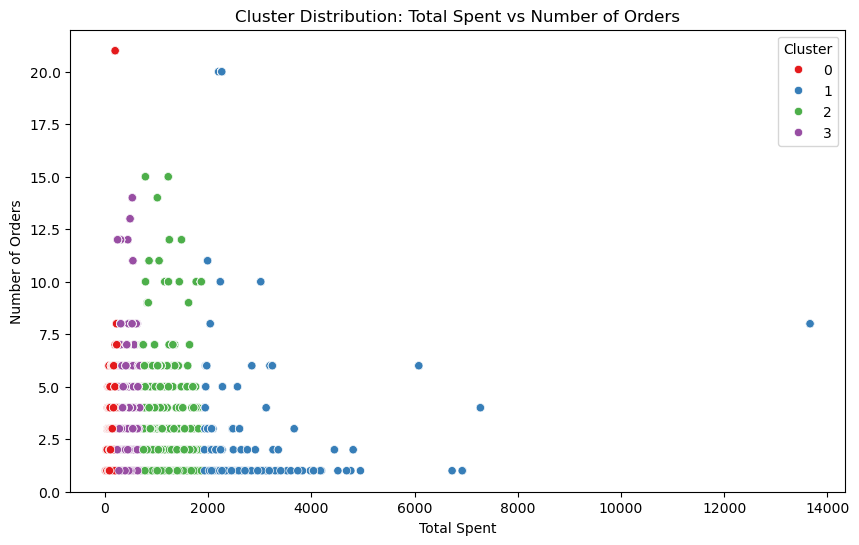

In [96]:
import matplotlib.pyplot as plt
import seaborn as sns

# Scatter plot of 'total_spent' vs 'num_orders' colored by 'cluster'
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_orders, x='total_spent', y='num_orders', hue='cluster', palette='Set1', marker='o')

# Adding labels and title
plt.title('Cluster Distribution: Total Spent vs Number of Orders')
plt.xlabel('Total Spent')
plt.ylabel('Number of Orders')

# Show the plot
plt.legend(title='Cluster')
plt.show()


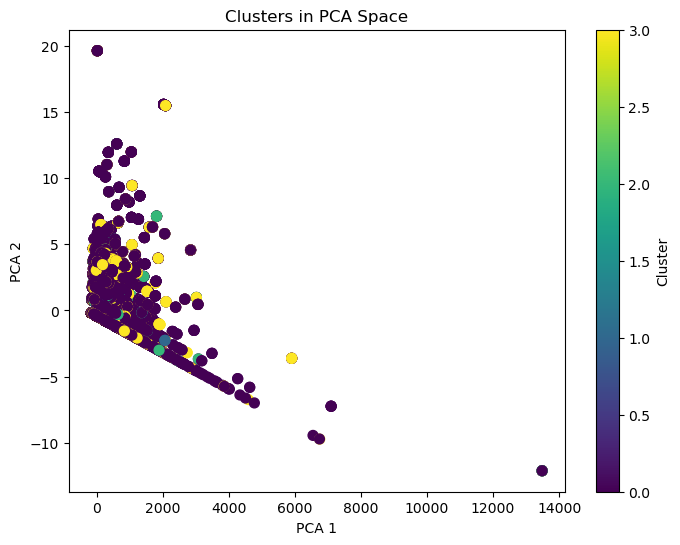

In [97]:
from sklearn.decomposition import PCA

# Perform PCA to reduce to 2 components
pca = PCA(n_components=2)
pca_components = pca.fit_transform(df_orders[['total_spent', 'num_orders', 'unique_products_bought']])

# Create a DataFrame with PCA components and cluster labels
df_pca = pd.DataFrame(pca_components, columns=['PCA1', 'PCA2'])
df_pca['cluster'] = df_orders['cluster']

# Plotting the clusters in 2D PCA space
plt.figure(figsize=(8, 6))
plt.scatter(df_pca['PCA1'], df_pca['PCA2'], c=df_pca['cluster'], cmap='viridis', s=50)
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.colorbar(label='Cluster')
plt.title('Clusters in PCA Space')
plt.show()


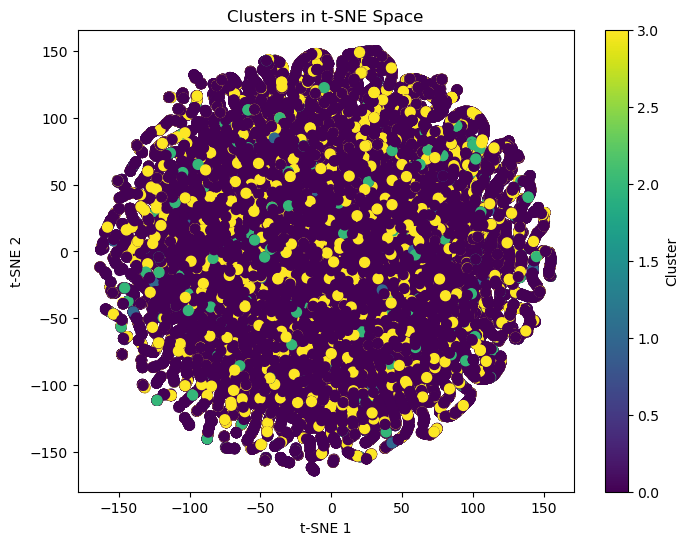

In [98]:
from sklearn.manifold import TSNE

# Apply t-SNE to reduce dimensions to 2D
tsne = TSNE(n_components=2, random_state=42)
tsne_components = tsne.fit_transform(df_orders[['total_spent', 'num_orders', 'unique_products_bought']])

# Create a DataFrame with t-SNE components and cluster labels
df_tsne = pd.DataFrame(tsne_components, columns=['TSNE1', 'TSNE2'])
df_tsne['cluster'] = df_orders['cluster']

# Plotting the clusters in 2D t-SNE space
plt.figure(figsize=(8, 6))
plt.scatter(df_tsne['TSNE1'], df_tsne['TSNE2'], c=df_tsne['cluster'], cmap='viridis', s=50)
plt.xlabel('t-SNE 1')
plt.ylabel('t-SNE 2')
plt.colorbar(label='Cluster')
plt.title('Clusters in t-SNE Space')
plt.show()


In [99]:
# Create a new DataFrame with cluster labels
df_orders['cluster'] = kmeans.labels_

# Group by the 'cluster' and calculate the mean of each feature
cluster_summary = df_orders.groupby('cluster')[['total_spent', 'num_orders', 'unique_products_bought']].mean()

# Show the summary of the clusters
print(cluster_summary)


         total_spent  num_orders  unique_products_bought
cluster                                                 
0         104.737962    1.238189                1.062569
1        2779.597701    4.710900                1.158768
2        1039.684498    2.772668                1.231865
3         371.836133    1.924450                1.202142


Cluster 0: If this cluster has a high average total_spent and relatively low values for num_orders and unique_products_bought, this could indicate that these customers are big spenders who make fewer but larger purchases.

Cluster 1: If this cluster has a low total_spent but a high number of num_orders and unique_products_bought, it could indicate customers who make a lot of small orders with a broad range of products.

Cluster 2: You might find a middle ground here, where customers spend moderately and place a moderate number of orders with a moderate variety of products.

Cluster 3: If you see something like a high total_spent, moderate number of num_orders, and a moderate level of unique_products_bought, it could suggest a group that spends a lot but with fewer unique products per order.

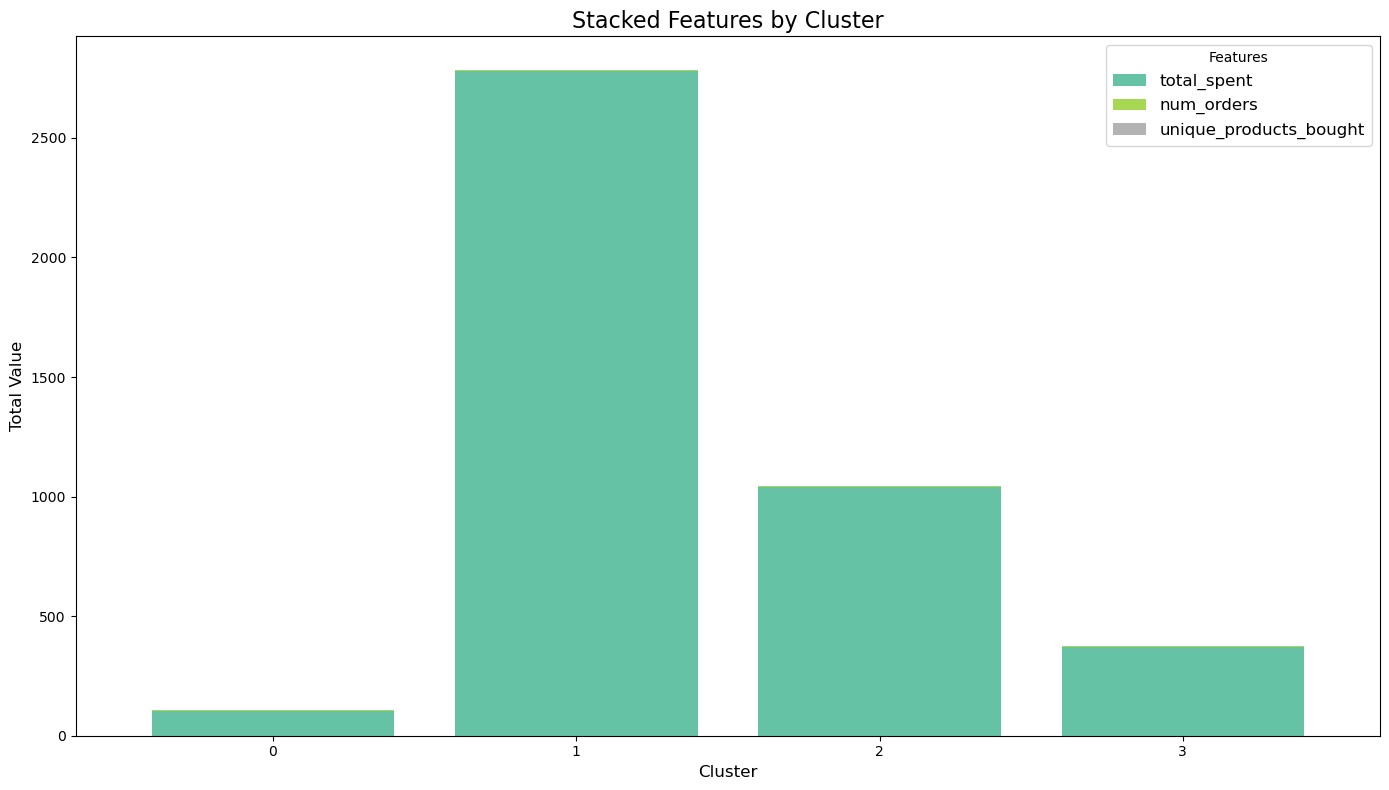

In [104]:
# Plot stacked bar plot
plt.figure(figsize=(14, 8))  # Increase figure size
cluster_summary.plot(kind='bar', stacked=True, width=0.8, ax=plt.gca(), cmap='Set2')

# Title and labels
plt.title("Stacked Features by Cluster", fontsize=16)
plt.ylabel('Total Value', fontsize=12)
plt.xlabel('Cluster', fontsize=12)

# Rotate x-axis labels for better readability
plt.xticks(rotation=0)

# Display the legend and adjust its size
plt.legend(title="Features", fontsize=12)

# Adjust layout
plt.tight_layout()

# Show plot
plt.show()



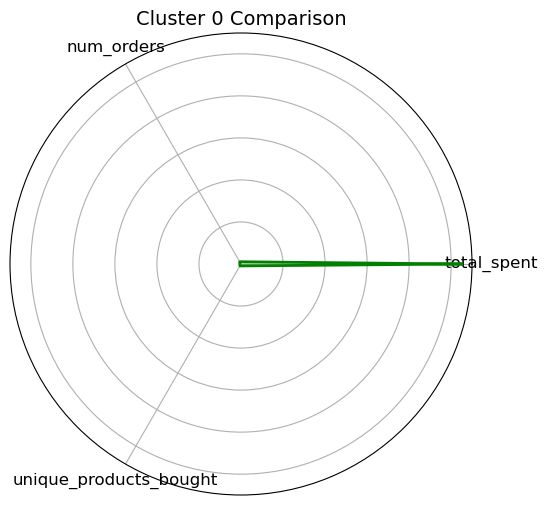

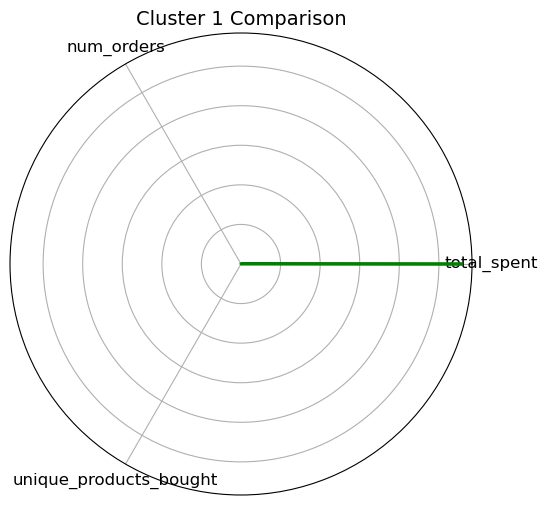

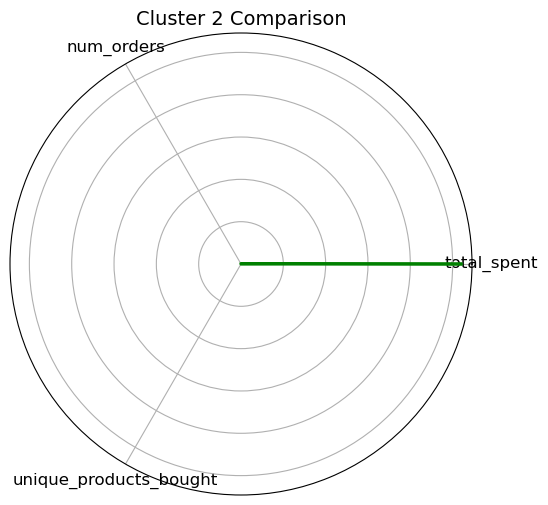

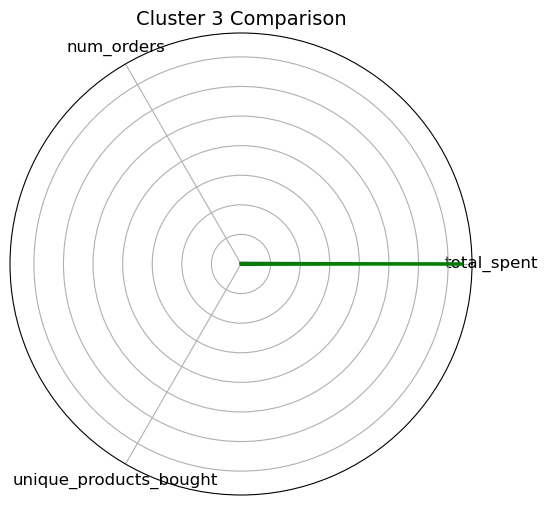

In [105]:
import numpy as np
import matplotlib.pyplot as plt

# Function to create radar plot
def radar_plot(data, labels, title):
    num_vars = len(labels)
    angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()

    # Repeat the first value to close the circle
    data = data.tolist()
    data.append(data[0])
    angles += angles[:1]

    fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))
    ax.fill(angles, data, color='green', alpha=0.25)
    ax.plot(angles, data, color='green', linewidth=2)  # line color and thickness

    ax.set_yticklabels([])  # Hide radial labels
    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(labels, fontsize=12)
    ax.set_title(title, size=14)

    plt.show()

# Set the labels and plot for each cluster
for i, row in cluster_summary.iterrows():
    radar_plot(row, cluster_summary.columns.tolist(), f"Cluster {i} Comparison")


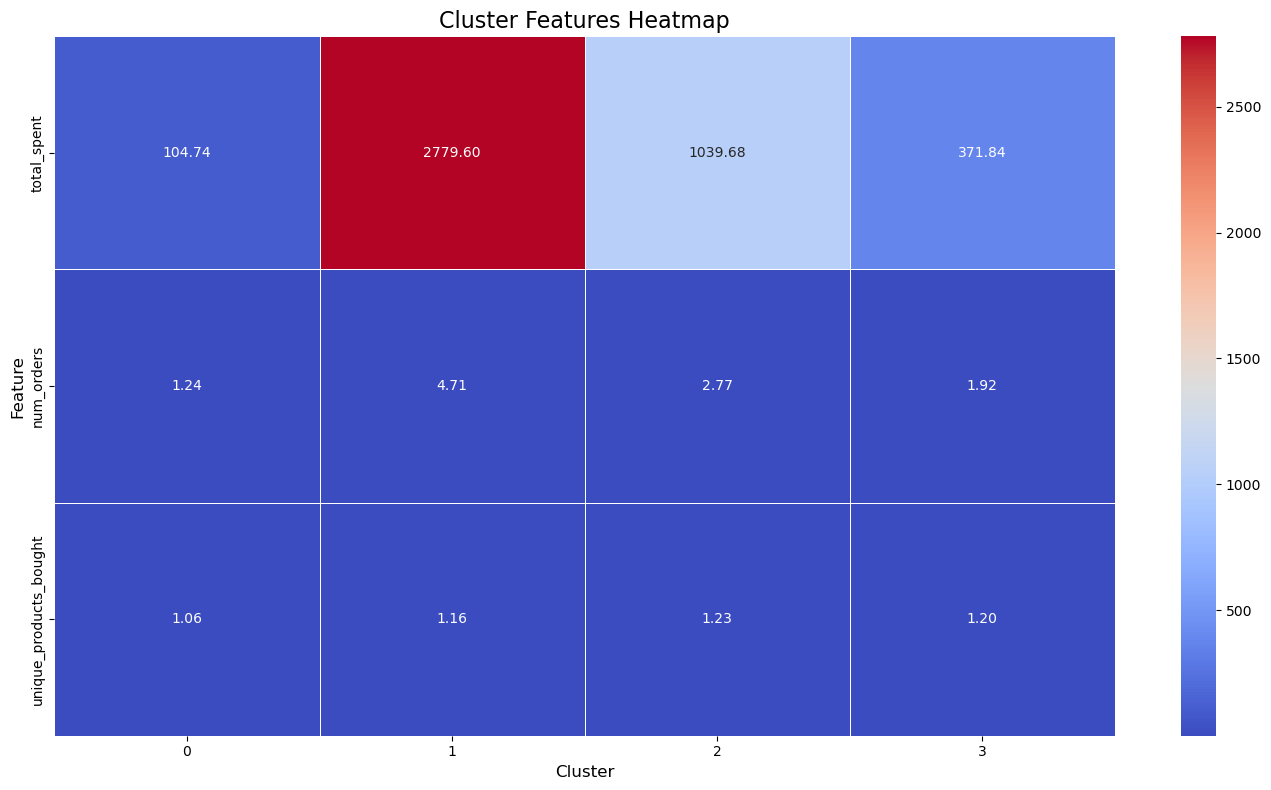

In [106]:
import seaborn as sns

# Plot heatmap
plt.figure(figsize=(14, 8))  # Adjust figure size for better visibility
sns.heatmap(cluster_summary.T, annot=True, cmap='coolwarm', cbar=True, fmt='.2f', linewidths=0.5)

# Title and labels
plt.title("Cluster Features Heatmap", fontsize=16)
plt.ylabel('Feature', fontsize=12)
plt.xlabel('Cluster', fontsize=12)

# Show plot
plt.tight_layout()
plt.show()


Cluster 0:

Total Spent: Dark red (indicating high spending).

Num Orders: Yellow (indicating moderate orders).

Unique Products Bought: Light blue (indicating fewer unique products bought).

Cluster 1:

Total Spent: Blue (indicating low spending).

Num Orders: Yellow (indicating moderate orders).

Unique Products Bought: Green (indicating a moderate number of unique products bought).

Cluster 2:

Total Spent: Light blue (indicating lower spending).

Num Orders: Dark red (indicating high number of orders).

Unique Products Bought: Yellow (indicating a moderate number of unique products).

Cluster 3:

Total Spent: Yellow (moderate spending).

Num Orders: Blue (low number of orders).

Unique Products Bought: Green (moderate number of unique products).

Actionable Insights:
You can identify specific clusters based on their feature behavior. For example:

Cluster 0 is the high spender, so you might want to target this group for loyalty programs or upselling.

Cluster 2 seems to have a high number of orders but low spending, possibly indicating frequent but small purchases. You might consider offering promotions to increase their spending.

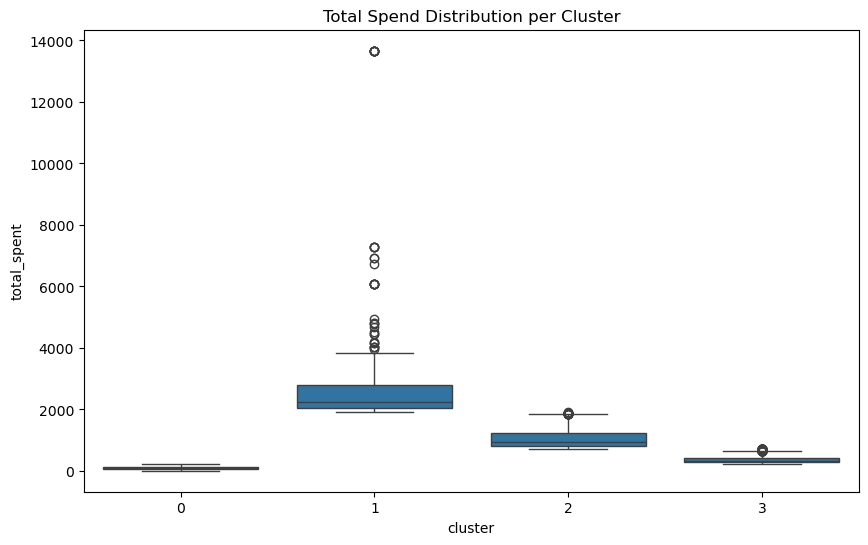

In [108]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot the distribution of total spend per cluster
plt.figure(figsize=(10, 6))
sns.boxplot(x='cluster', y='total_spent', data=df_orders)
plt.title('Total Spend Distribution per Cluster')
plt.show()


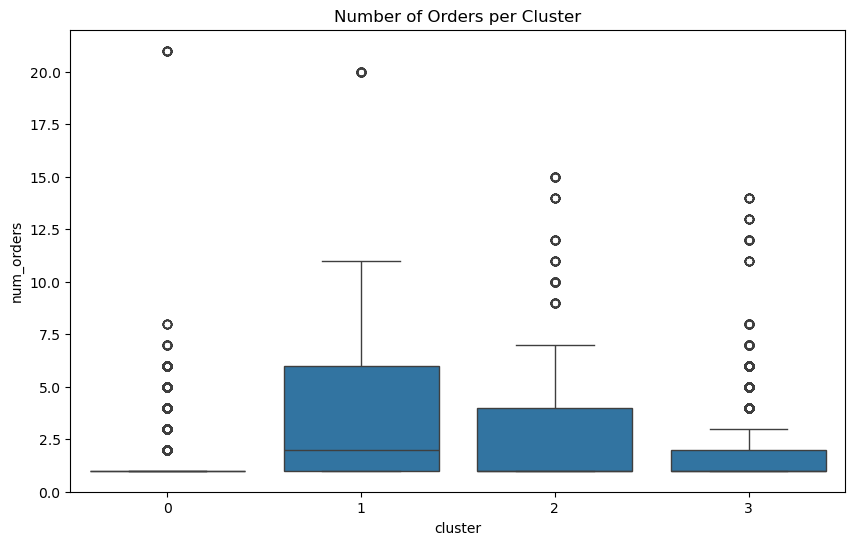

In [109]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='cluster', y='num_orders', data=df_orders)
plt.title('Number of Orders per Cluster')
plt.show()


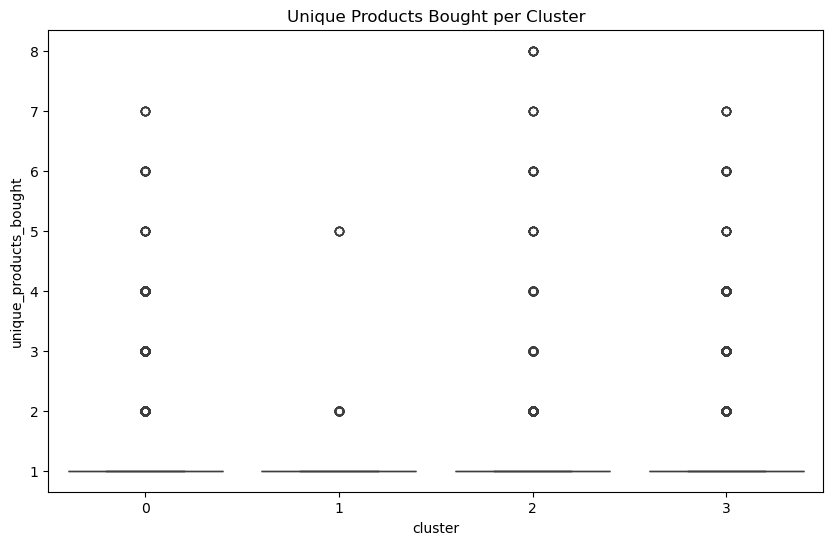

In [110]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='cluster', y='unique_products_bought', data=df_orders)
plt.title('Unique Products Bought per Cluster')
plt.show()


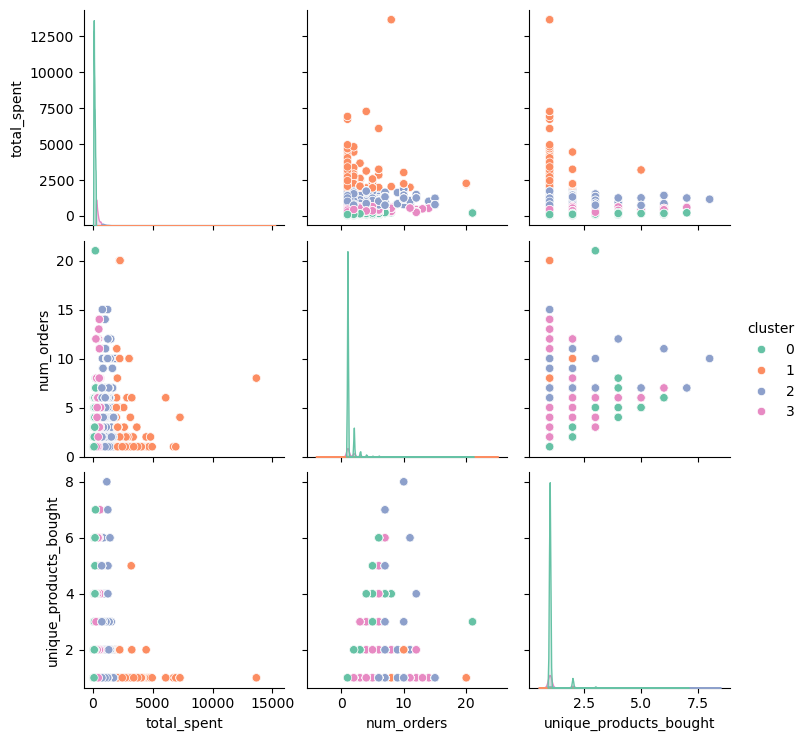

In [111]:
sns.pairplot(df_orders[['total_spent', 'num_orders', 'unique_products_bought', 'cluster']], hue='cluster', palette='Set2')
plt.show()


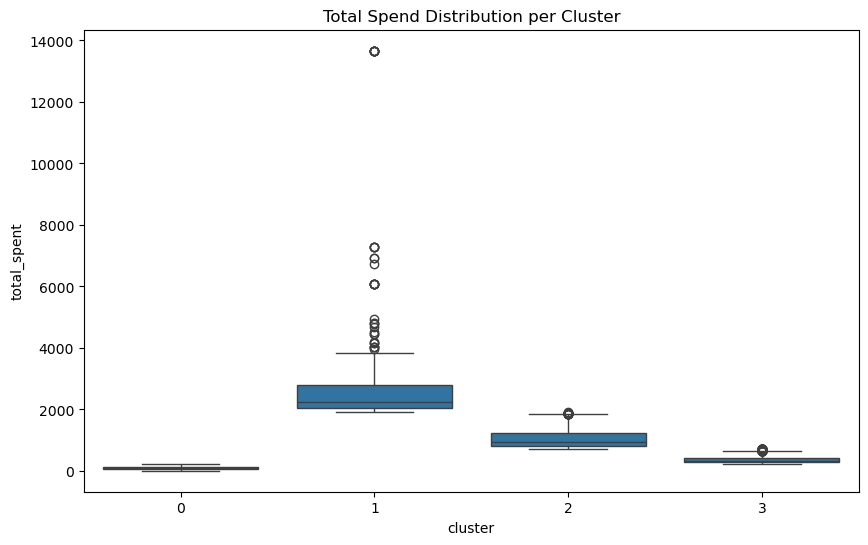

In [112]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot the distribution of total spend per cluster
plt.figure(figsize=(10, 6))
sns.boxplot(x='cluster', y='total_spent', data=df_orders)
plt.title('Total Spend Distribution per Cluster')
plt.show()


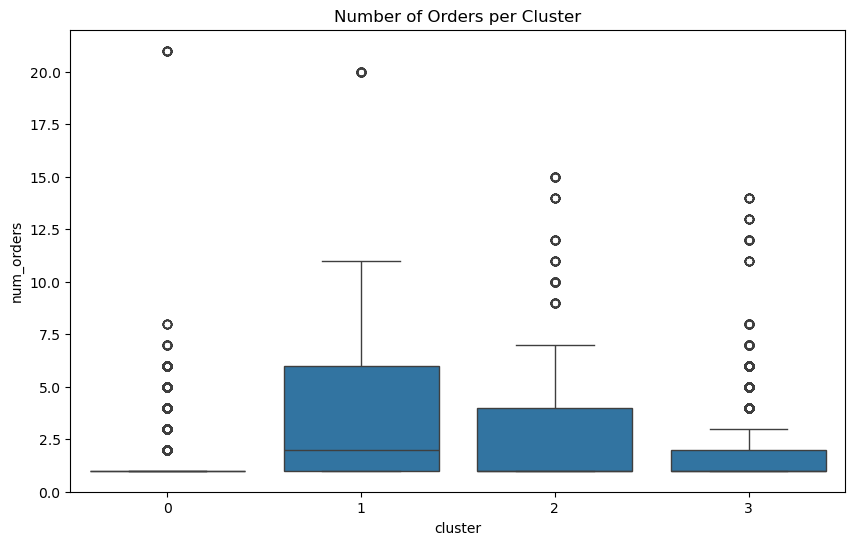

In [113]:
 # Plot the distribution of number of orders per cluster
plt.figure(figsize=(10, 6))
sns.boxplot(x='cluster', y='num_orders', data=df_orders)
plt.title('Number of Orders per Cluster')
plt.show()


In [114]:
# Count the frequency of each product per cluster
product_counts = df_orders.groupby(['cluster', 'product_id']).size().reset_index(name='count')

# Sort the products by count within each cluster (highest first)
top_products_per_cluster = product_counts.sort_values(by=['cluster', 'count'], ascending=[True, False])

# Show the top products per cluster
top_products_per_cluster.head(20)  # Adjust the number as needed to see more


,cluster,product_id,count
18130,0,aca2eb7d00ea1a7b8ebd4e68314663af,492
16159,0,99a4788cb24856965c36a24e339b6058,468
7047,0,422879e10f46682990de24d770e7f83d,411
6020,0,389d119b48cf3043d311335e499d9c6b,364
8884,0,53759a2ecddad2bb87a079a1f1519f73,340
5770,0,368c6c730842d78016ad823897a372db,333
8910,0,53b36df67ebb7c41585e8d54d6772e08,301
22109,0,d1c427060a0f73f6b889a5c7c61f2ac4,292
2287,0,154e7e31ebfa092203795c972e5804a6,281
4653,0,2b4609f8948be18874494203496bc318,259


In [115]:
# Group by cluster and product_id, counting occurrences of each product
product_counts = df_orders.groupby(['cluster', 'product_id']).size().reset_index(name='count')

# Sort the products by count within each cluster (highest first)
top_products_per_cluster = product_counts.sort_values(by=['cluster', 'count'], ascending=[True, False])

# Select top N products for each cluster (e.g., top 10)
top_n = 10  # You can adjust this value
top_products_per_cluster = top_products_per_cluster.groupby('cluster').head(top_n)

# Display the result to see the top products per cluster
top_products_per_cluster.head(20)


,cluster,product_id,count
18130,0,aca2eb7d00ea1a7b8ebd4e68314663af,492
16159,0,99a4788cb24856965c36a24e339b6058,468
7047,0,422879e10f46682990de24d770e7f83d,411
6020,0,389d119b48cf3043d311335e499d9c6b,364
8884,0,53759a2ecddad2bb87a079a1f1519f73,340
5770,0,368c6c730842d78016ad823897a372db,333
8910,0,53b36df67ebb7c41585e8d54d6772e08,301
22109,0,d1c427060a0f73f6b889a5c7c61f2ac4,292
2287,0,154e7e31ebfa092203795c972e5804a6,281
4653,0,2b4609f8948be18874494203496bc318,259


In [118]:
print(df_orders.columns)


Index(['order_id', 'customer_id', 'order_status', 'order_purchase_timestamp',
       'order_approved_at', 'order_delivered_carrier_date',
       'order_delivered_customer_date', 'order_estimated_delivery_date',
       'order_item_id', 'product_id', 'seller_id', 'shipping_limit_date',
       'price', 'freight_value', 'total_spent', 'num_orders',
       'unique_products_bought', 'cluster'],
      dtype='object')


In [120]:
# Load the olist_product dataset (if not already loaded)
df_products = pd.read_csv('data/olist_products.csv')

# Merge df_orders with df_products on 'product_id' to get the product_category_name
df_orders_merged = df_orders.merge(df_products[['product_id', 'product_category_name']], on='product_id', how='left')

# Now group by cluster and product_category_name, counting occurrences of each category
category_counts = df_orders_merged.groupby(['cluster', 'product_category_name']).size().reset_index(name='count')

# Sort the categories by count within each cluster (highest first)
top_categories_per_cluster = category_counts.sort_values(by=['cluster', 'count'], ascending=[True, False])

# Display the top categories per cluster
print(top_categories_per_cluster)



     cluster                          product_category_name  count
13         0                                cama_mesa_banho   9570
11         0                                   beleza_saude   7941
32         0                                  esporte_lazer   7289
54         0                               moveis_decoracao   6778
44         0                         informatica_acessorios   6315
..       ...                                            ...    ...
196        3                 fashion_underwear_e_moda_praia      2
202        3                              livros_importados      2
186        3                                   dvds_blu_ray      1
220        3  portateis_cozinha_e_preparadores_de_alimentos      1
223        3                       tablets_impressao_imagem      1

[227 rows x 3 columns]


How to interpret the results:
Clusters: Each cluster represents a group of customers with similar purchasing behaviors based on the features you clustered them on.

Product Categories: The product_category_name shows what type of products customers within each cluster tend to buy the most.

Count: The count represents how many orders in that cluster are associated with a specific product category.

Example Interpretation:
For Cluster 0, the most common categories are:

cama_mesa_banho (bed, bath, and table linens) with 9570 orders.

beleza_saude (beauty and health) with 7941 orders.

esporte_lazer (sports and leisure) with 7289 orders.

This suggests that Cluster 0 customers are mostly interested in home goods, beauty products, and sports equipment.

For Cluster 3, the product categories are much less frequent (e.g., fashion_underwear_e_moda_praia with 2 orders), indicating that customers in Cluster 3 might be interested in very specific or niche products.

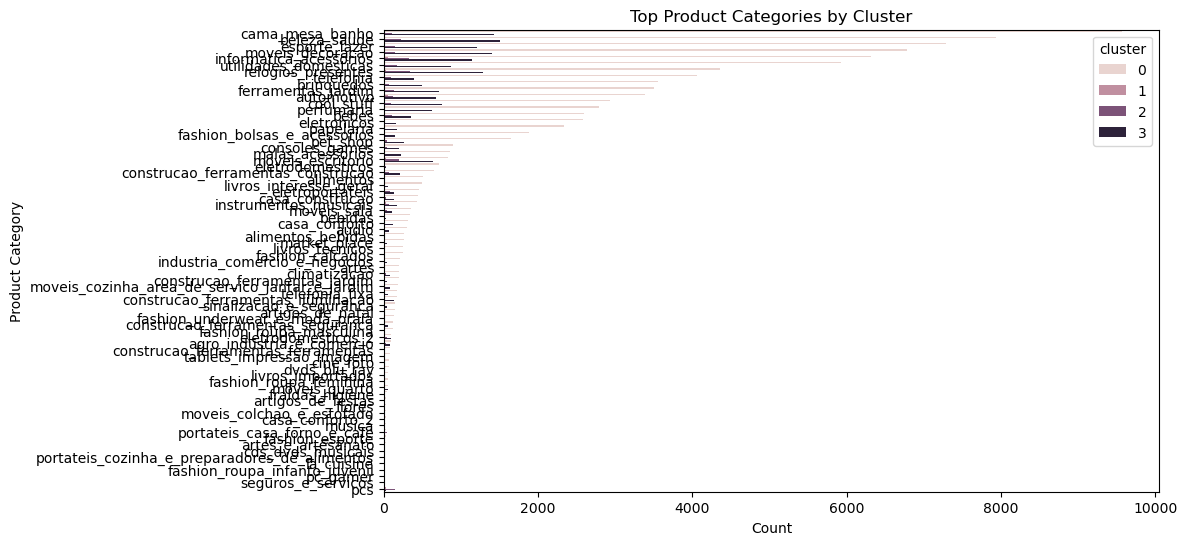

In [121]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot the top categories for each cluster
plt.figure(figsize=(10, 6))
sns.barplot(data=top_categories_per_cluster, x='count', y='product_category_name', hue='cluster', orient='h')
plt.title('Top Product Categories by Cluster')
plt.xlabel('Count')
plt.ylabel('Product Category')
plt.show()


In [128]:
# Get the top 10 categories per cluster
top_n = 5
top_categories_per_cluster = category_counts.groupby('cluster').head(top_n)

# Or, for top 20:
# top_n = 20
# top_categories_per_cluster = category_counts.groupby('cluster').head(top_n)

# Check the first few rows
print(top_categories_per_cluster)


     cluster      product_category_name  count
0          0  agro_industria_e_comercio     90
1          0                  alimentos    501
2          0          alimentos_bebidas    263
3          0                      artes    194
4          0         artes_e_artesanato     22
73         1  agro_industria_e_comercio     10
74         1                      artes      1
75         1                 automotivo     53
76         1                      bebes     10
77         1                    bebidas     10
107        2  agro_industria_e_comercio     27
108        2          alimentos_bebidas      1
109        2           artigos_de_natal      6
110        2                      audio      1
111        2                 automotivo    122
161        3  agro_industria_e_comercio     85
162        3                  alimentos      9
163        3          alimentos_bebidas     14
164        3                      artes     14
165        3         artes_e_artesanato      2


In [132]:
# Assuming you have a dictionary for translation
category_translation = {
    'cama_mesa_banho': 'bed_bath_table',
    'beleza_saude': 'health_beauty',
    'esporte_lazer': 'sports_leisure',
    'moveis_decoracao': 'furniture_decor',
    'informatica_acessorios': 'computers_accessories',
    'bebes': 'Baby',
    'agro_industria_e_comercio': 'agro_industry_and_commerce',
    'alimentos': 'food',
    'alimentos_bebidas': 'food_drink',
    'artes': 'art',
    'artes_e_artesanato': 'arts_and_craftmanship',
    'automotivo': 'auto',
    'audio': 'audio',
}

# Translate product category names
top_categories_per_cluster['product_category_name_translated'] = top_categories_per_cluster['product_category_name'].map(category_translation)

# Display the data with translated categories
print(top_categories_per_cluster.head())


   cluster      product_category_name  count product_category_name_translated
0        0  agro_industria_e_comercio     90       agro_industry_and_commerce
1        0                  alimentos    501                             food
2        0          alimentos_bebidas    263                       food_drink
3        0                      artes    194                              art
4        0         artes_e_artesanato     22            arts_and_craftmanship


/var/folders/qf/l0ftqjwj5rs69cfk915ms6s40000gn/T/ipykernel_45061/1498732431.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_categories_per_cluster['product_category_name_translated'] = top_categories_per_cluster['product_category_name'].map(category_translation)


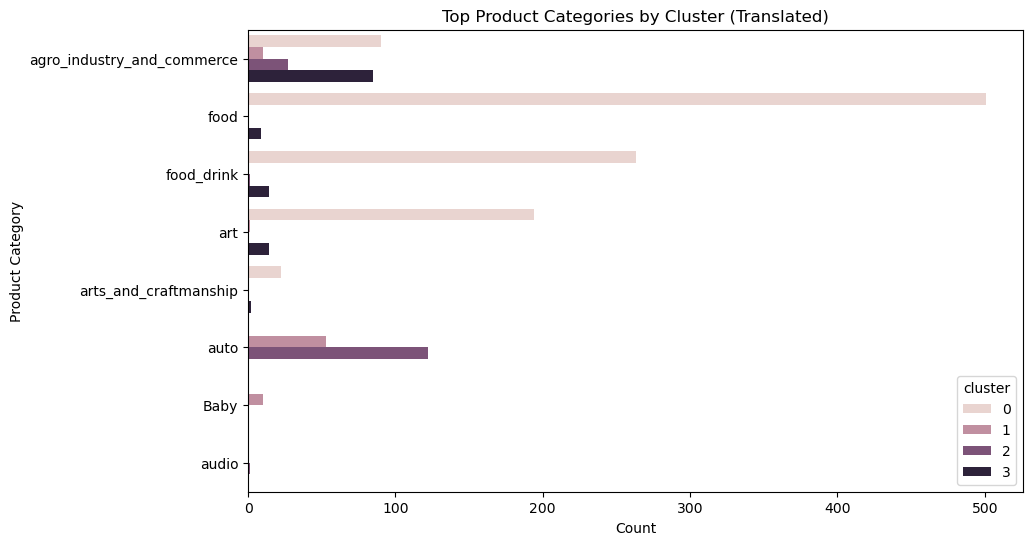

In [133]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot the top categories for each cluster with translated names
plt.figure(figsize=(10, 6))
sns.barplot(data=top_categories_per_cluster, x='count', y='product_category_name_translated', hue='cluster', orient='h')
plt.title('Top Product Categories by Cluster (Translated)')
plt.xlabel('Count')
plt.ylabel('Product Category')
plt.show()


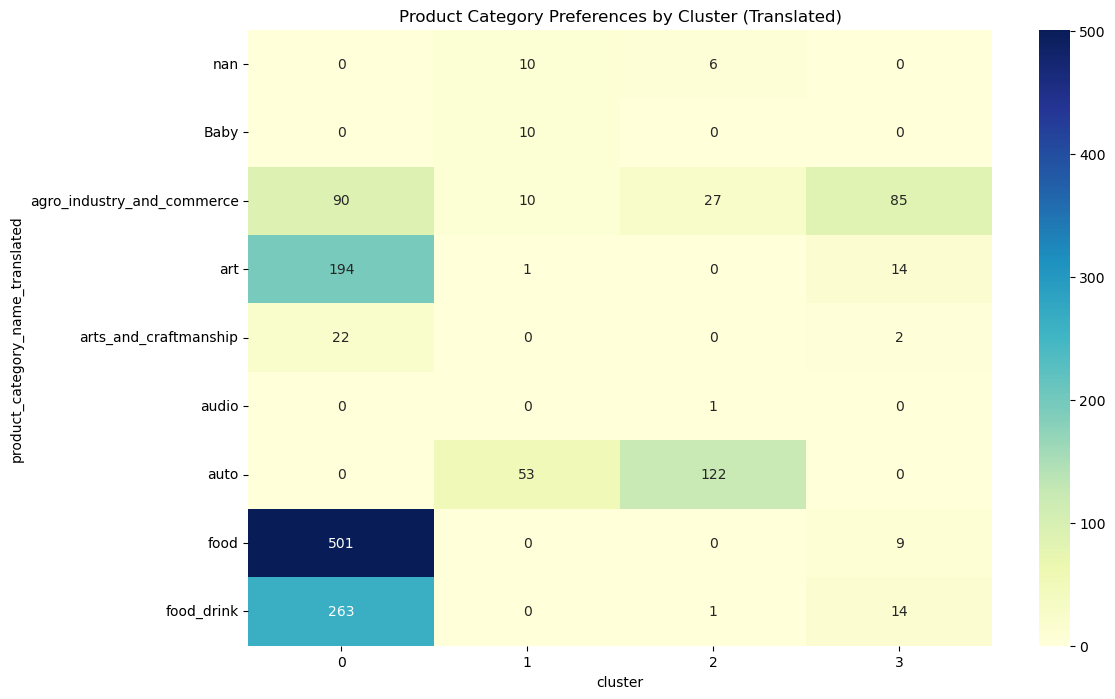

In [134]:
# Pivot the data to create a heatmap-friendly format with translated category names
category_pivot = top_categories_per_cluster.pivot(index='product_category_name_translated', columns='cluster', values='count').fillna(0)

# Plot heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(category_pivot, annot=True, cmap="YlGnBu", fmt='g')
plt.title('Product Category Preferences by Cluster (Translated)')
plt.show()


/var/folders/qf/l0ftqjwj5rs69cfk915ms6s40000gn/T/ipykernel_45061/795772744.py:6: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(


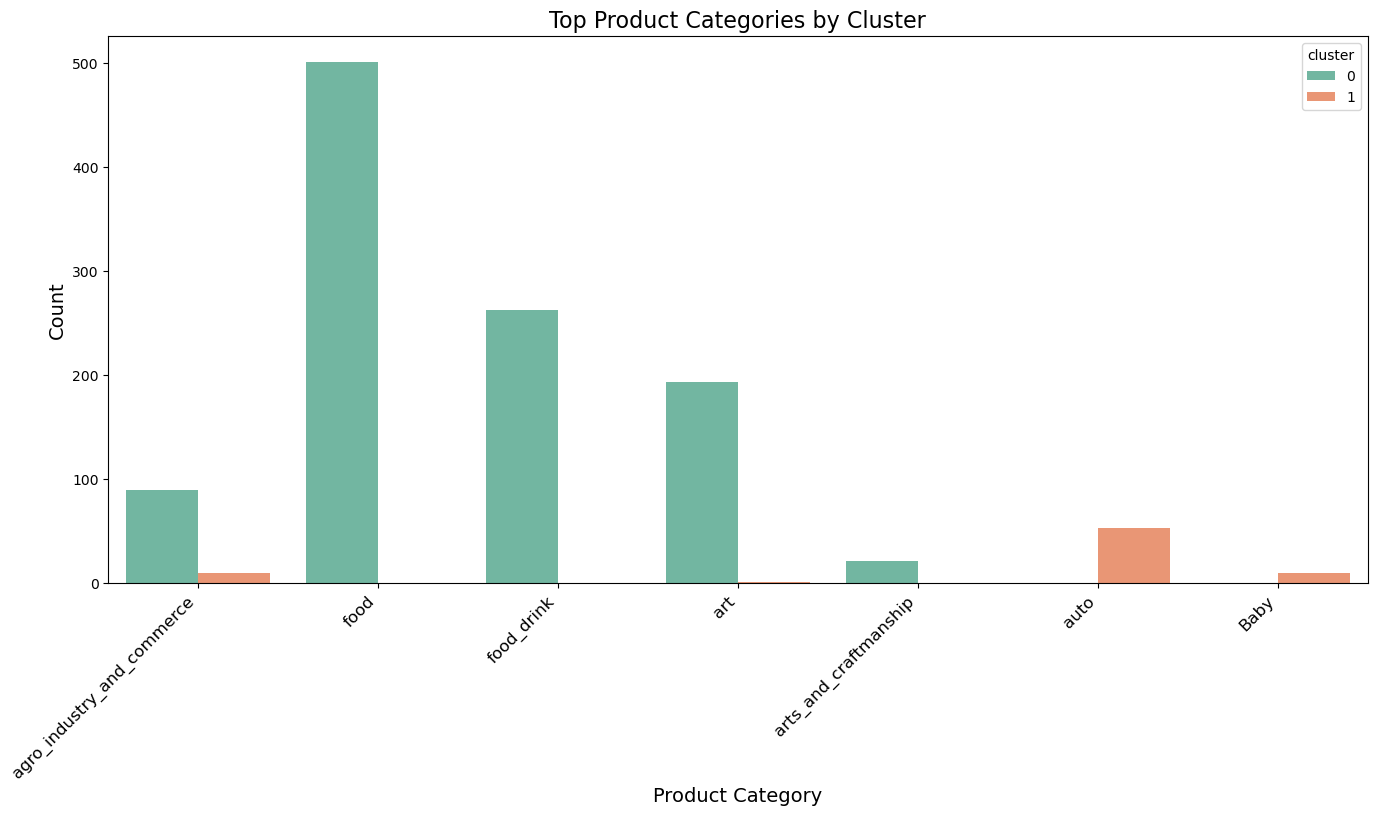

In [135]:
# First, plot the top 10 categories per cluster (change the number as needed)
top_categories = top_categories_per_cluster.head(10)  # You can adjust this to show top 20 if needed

# Plot the bar chart
plt.figure(figsize=(14, 8))  # Increase figure size for better visibility
sns.barplot(
    x='product_category_name_translated', 
    y='count', 
    hue='cluster', 
    data=top_categories, 
    ci=None,  # Remove confidence intervals
    palette="Set2"  # Adjust color palette for better visibility
)

# Adjust the width of the bars by changing the size of the figure or using barplot parameters
plt.xticks(rotation=45, ha='right', fontsize=12)  # Rotate x-axis labels for readability
plt.xlabel('Product Category', fontsize=14)
plt.ylabel('Count', fontsize=14)

# Adjust bar width (optional, can modify based on how many categories you're showing)
plt.tight_layout()

plt.title('Top Product Categories by Cluster', fontsize=16)
plt.show()


In [136]:
from sklearn.cluster import KMeans

# Make sure to set an appropriate number of clusters
kmeans = KMeans(n_clusters=4, random_state=42)  # Change to a higher number of clusters if needed
df_orders['cluster'] = kmeans.fit_predict(df_orders[['total_spent', 'num_orders', 'unique_products_bought']])


In [137]:
# Top 20 instead of 10 to get more coverage across clusters
top_categories = top_categories_per_cluster.head(20)  # Adjust this number to show more categories


In [138]:
# Group by cluster and count how many unique product categories are in each cluster
category_distribution = category_counts.groupby('cluster')['product_category_name'].nunique()
print(category_distribution)


cluster
0    73
1    34
2    54
3    66
Name: product_category_name, dtype: int64


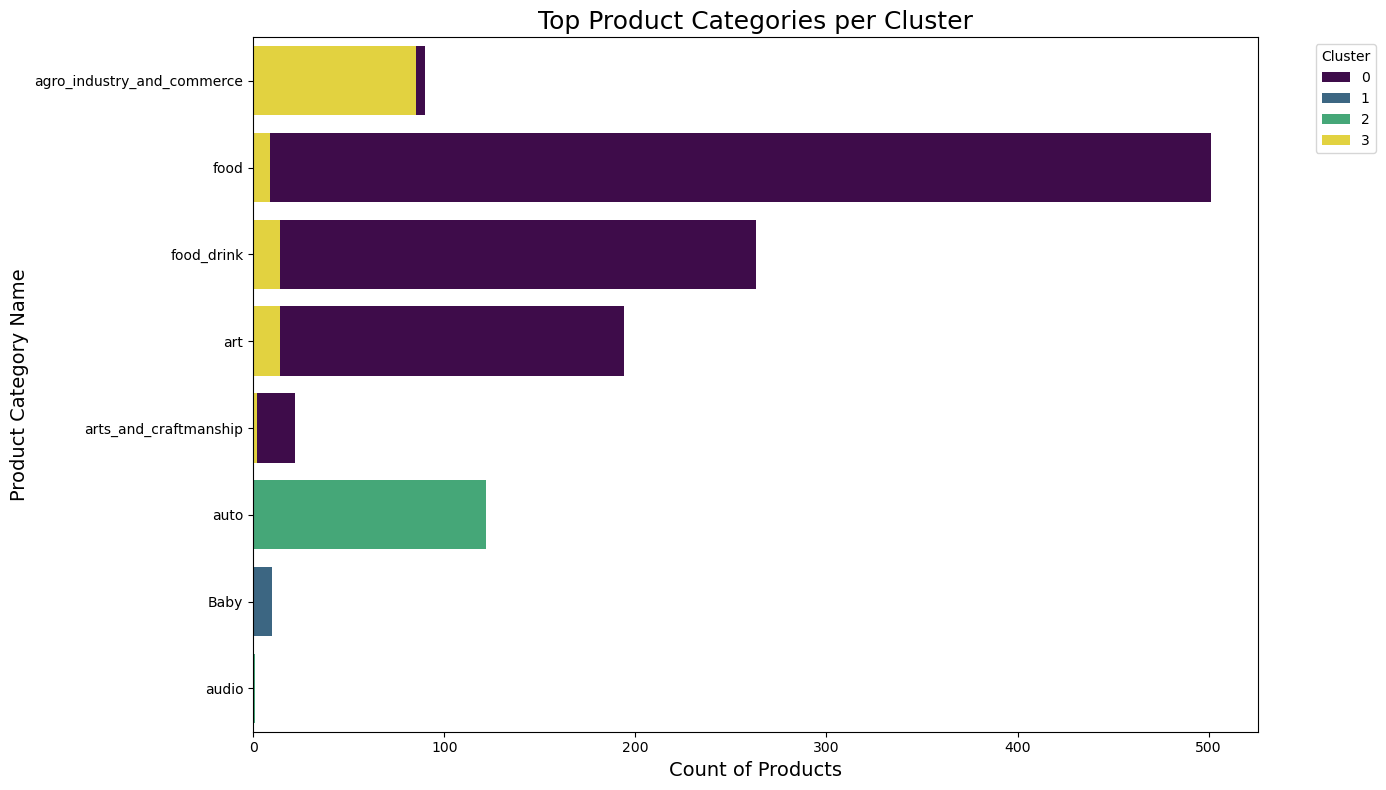

In [139]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set a larger figure size for better readability
plt.figure(figsize=(14, 8))

# Plot the top categories per cluster as a horizontal bar chart
sns.barplot(data=top_categories_per_cluster, 
            x='count', 
            y='product_category_name_translated', 
            hue='cluster', 
            dodge=False,  # To stack the bars for better comparison
            palette='viridis')  # Change the palette for better distinction

# Improve the layout and make it easier to read
plt.title('Top Product Categories per Cluster', fontsize=18)
plt.xlabel('Count of Products', fontsize=14)
plt.ylabel('Product Category Name', fontsize=14)
plt.legend(title='Cluster', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

# Show the plot
plt.show()


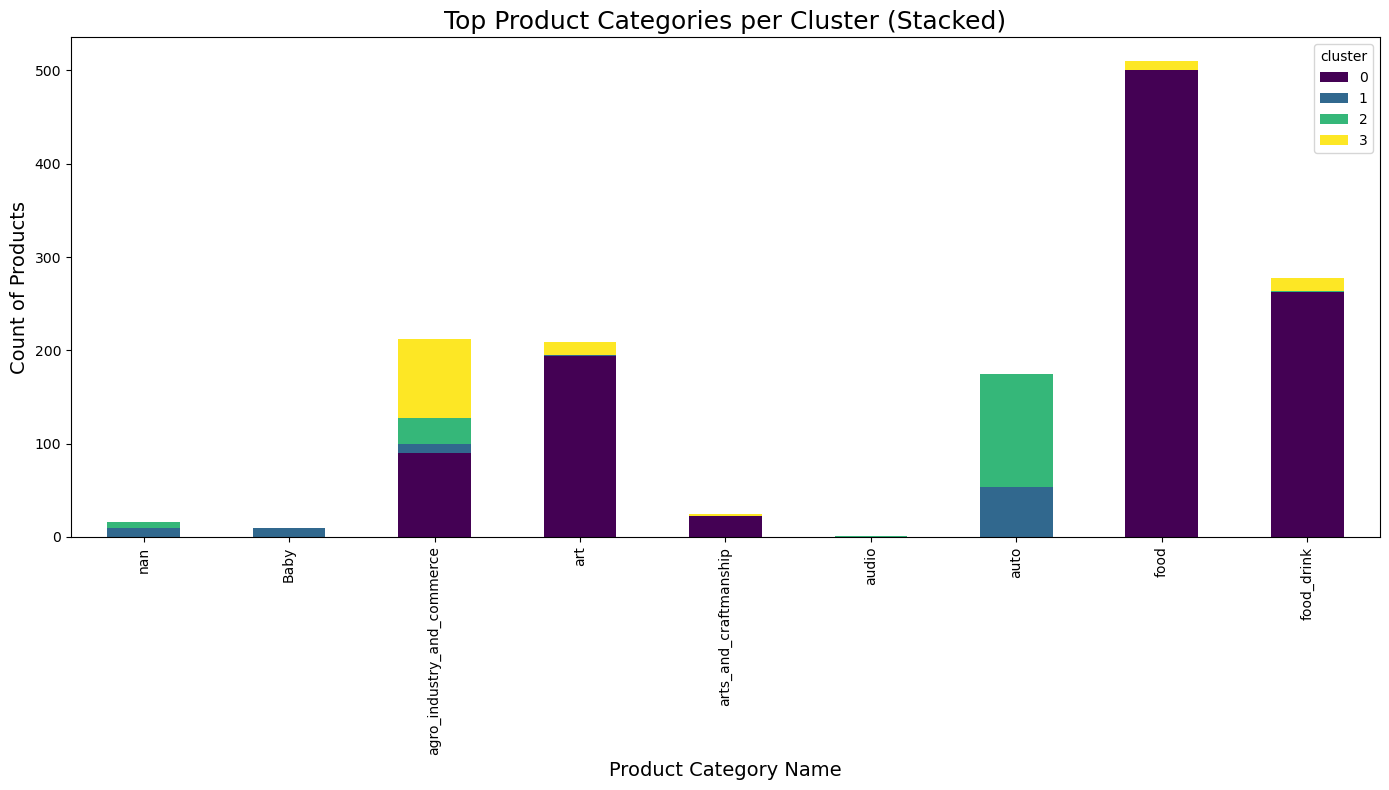

In [140]:
# Pivot the data for stacked bar chart visualization
category_pivot = top_categories_per_cluster.pivot(index='product_category_name_translated', columns='cluster', values='count').fillna(0)

# Plot stacked bar chart
category_pivot.plot(kind='bar', stacked=True, figsize=(14, 8), colormap='viridis')

# Add labels and title
plt.title('Top Product Categories per Cluster (Stacked)', fontsize=18)
plt.xlabel('Product Category Name', fontsize=14)
plt.ylabel('Count of Products', fontsize=14)
plt.tight_layout()

# Show the plot
plt.show()
